# Chapter 8: Classification Models
# By: Parisa Hormozzadeh
Classification is the task of predicting discrete labels (categories) for data points.

---

##  Classification Models in This Notebook
- **K-Nearest Neighbors (KNN):** Classifies based on the majority class among k nearest points.
- **Decision Trees:** Tree-structured model with rules splitting data by features.

---

## Preparing Data for Classification
- Features (X) and labels (y)
- Train-test split
- Feature scaling if needed (KNN benefits from scaling)

---

## Evaluating Classification Models
- **Accuracy:** (TP+TN)/Total
- **Confusion Matrix:** True Positives, False Positives, etc.
- **Precision, Recall, F1-Score:** For imbalanced data

---

# 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_set = pd.read_csv('power_consumption.csv')
data_set

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low


In [2]:
data_set.isnull().sum()

Datetime                     0
Temperature               2096
Humidity                     0
WindSpeed                   50
GeneralDiffuseFlows          0
DiffuseFlows                 0
PowerConsumption_Zone1       0
PowerConsumption_Zone2       0
PowerConsumption_Zone3       0
PowerDemandCategory          0
dtype: int64

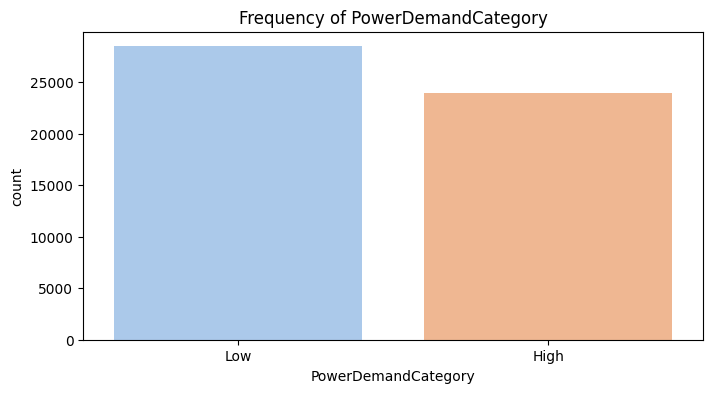

In [3]:
plt.figure(figsize=(8, 4))
sns.countplot(x='PowerDemandCategory', data=data_set, palette='pastel')
plt.title('Frequency of PowerDemandCategory')
plt.show()

# 2. Preprocessing 

## 2.1. Train & Test & Validation

 Train = 0.7 | Test = 0.2 | Validation = 0.1

In [5]:
X = data_set.drop(columns=['PowerDemandCategory']) 
X = X.drop('Datetime' , axis=1)
y = data_set['PowerDemandCategory']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42)  # 20% test, 10% validation

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 36691
Test set size: 5241
Validation set size: 10484


## 2.2. Handling Missing Values

In [21]:
mean_values_Temperature = X_train['Temperature'].mean()
min_values_WindSpeed = X_train['WindSpeed'].min()

X_train['Temperature'] =  X_train['Temperature'].fillna(mean_values_Temperature)
X_train['WindSpeed'] =  X_train['WindSpeed'].fillna(min_values_WindSpeed)
X_train.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [22]:
X_test['Temperature'] =  X_test['Temperature'].fillna(mean_values_Temperature)
X_test['WindSpeed'] =  X_test['WindSpeed'].fillna(min_values_WindSpeed)
X_test.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [23]:
X_val['Temperature'] =  X_val['Temperature'].fillna(mean_values_Temperature)
X_val['WindSpeed'] =  X_val['WindSpeed'].fillna(min_values_WindSpeed)
X_val.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

## 2.3. Label Encoding


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

## 2.4. Normalization

### Min-Max Normalization
X' = (X- Xmin)/(Xmax - Xmin) ==> range [0, 1].

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
scaler

StandardScaler()

In [26]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# 3. Model Selection

## 3.1. K-Nearest Neighbors (KNN)
- Simple, instance-based classifier.
- Predicts class based on majority vote of nearest neighbors.
- Sensitive to feature scaling.

---

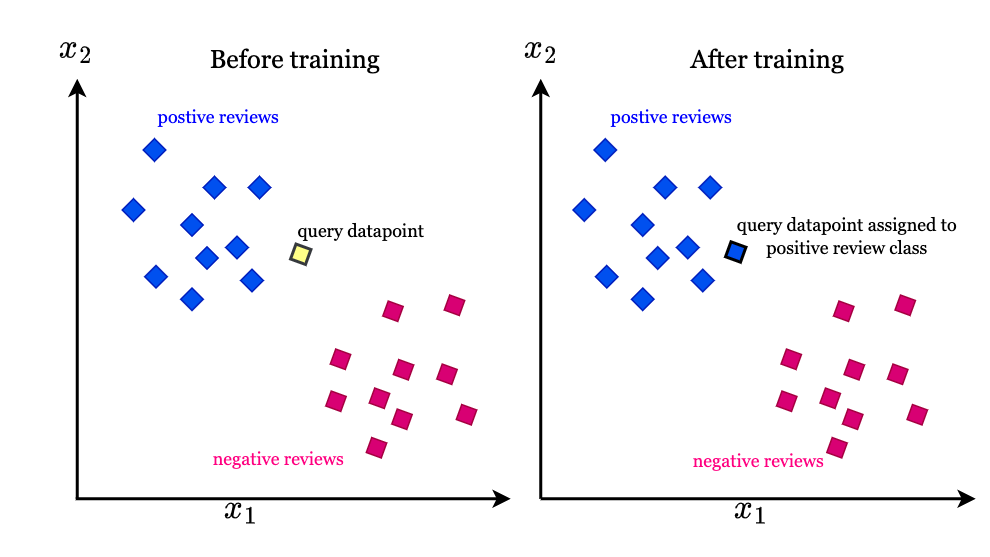

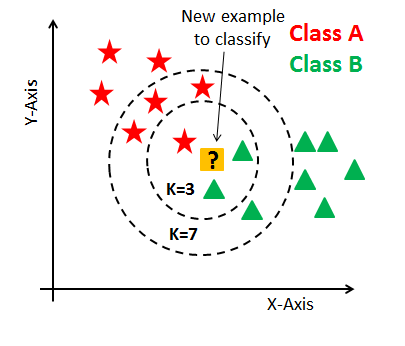

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

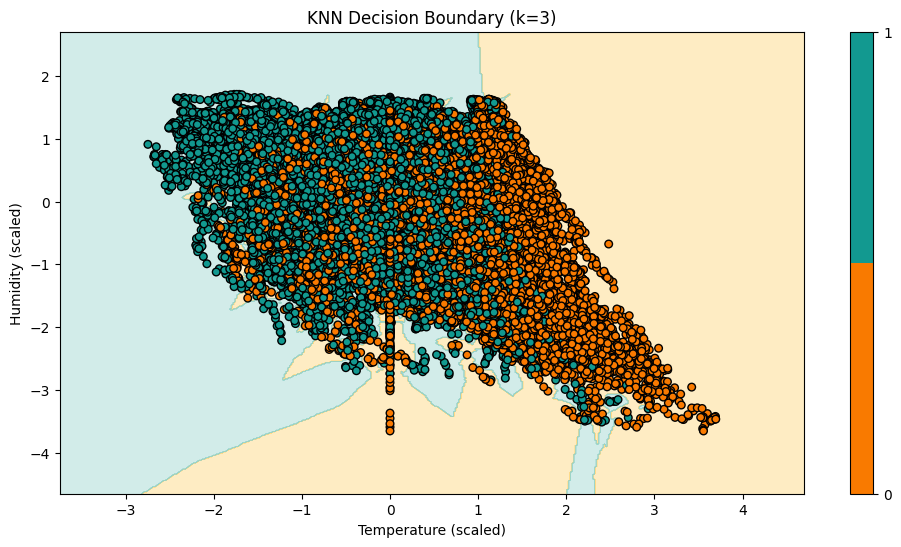

In [17]:
X_1 = X_train[['Temperature', 'Humidity']].values
y_1 = pd.DataFrame(y_train).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)
from matplotlib.colors import ListedColormap

def plot_knn_decision_boundary(X, y, n_neighbors, title):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y.ravel())  

    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_background = ListedColormap(['#FED16A', '#90D1CA'])  
    cmap_points = ListedColormap(['#F97A00', '#129990'])      

    plt.figure(figsize=(12, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_background)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=30, cmap=cmap_points, edgecolor='k')

    plt.title(title)
    plt.xlabel('Temperature (scaled)')
    plt.ylabel('Humidity (scaled)')
    plt.colorbar(scatter, ticks=np.unique(y)) 
    plt.show()

plot_knn_decision_boundary(X_scaled, y_1, n_neighbors=3, title="KNN Decision Boundary (k=3)")

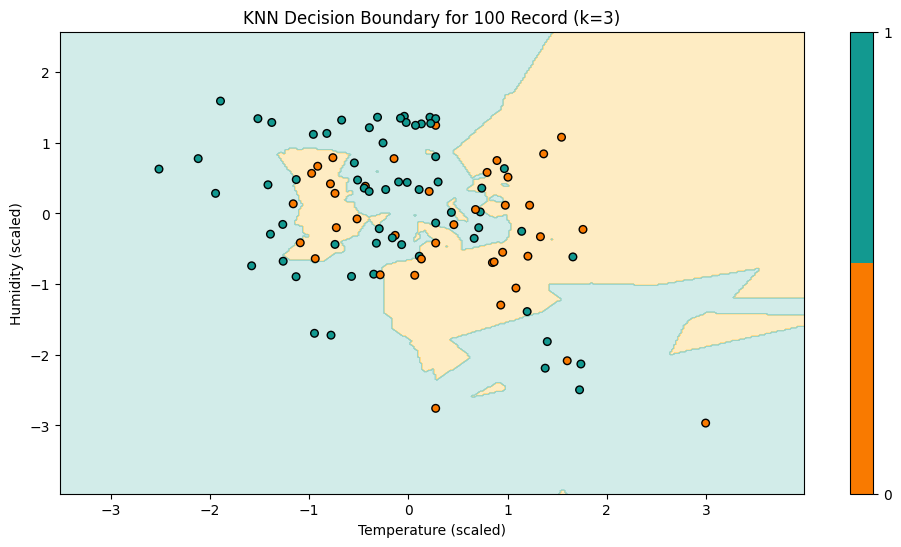

In [19]:
X_1 = X_train[['Temperature', 'Humidity']][:100].values
y_1 = pd.DataFrame(y_train)[:100].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)
plot_knn_decision_boundary(X_scaled, y_1, n_neighbors=3, title="KNN Decision Boundary for 100 Record (k=3)")

In [70]:
predict_labels_train_knn = neigh.predict(X_train)
pd.DataFrame(predict_labels_train_knn)

,0
0,0
1,1
2,1
3,0
4,0
...,...
36686,1
36687,1
36688,1
36689,0


In [71]:
accuracy_train = accuracy_score(y_train, predict_labels_train_knn)
print(f"Accuracy Train: {accuracy_train:.4f}")

Accuracy Train: 0.9956


In [72]:
predict_labels_test_knn = neigh.predict(X_test)
pd.DataFrame(predict_labels_test_knn)

,0
0,0
1,1
2,0
3,1
4,0
...,...
5236,0
5237,0
5238,1
5239,1


In [74]:
accuracy_test = accuracy_score(y_test, predict_labels_test_knn)
print(f"Accuracy Test: {accuracy_test:.4f}")

Accuracy Test: 0.9954


In [75]:
from sklearn.metrics import confusion_matrix

def classification_metrics_table(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()

    # ---- Calculate precision for each class
    precision_0 = TN / (TN + FN) * 100
    precision_1 = TP / (TP + FP) * 100

    # ----- Calculate recall for each class
    recall_0 = TN / (TN + FP) * 100
    recall_1 = TP / (TP + FN) * 100

    # ---- Calculate overall accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

    metrics_table = pd.DataFrame({
        "Predicted 0": [TN, FN, f"{precision_0:.2f}%"],
        "Predicted 1": [FP, TP, f"{precision_1:.2f}%"],
        "Class Recall (%)": [f"{recall_0:.2f}%", f"{recall_1:.2f}%", ""]
    }, index=["Actual 0", "Actual 1", "Class Precision (%)"])
    metrics_table.loc[""] = ["", "", f"Accuracy: {accuracy:.2f}%"]
    
    return pd.DataFrame(metrics_table)

conf_matrix = confusion_matrix(y_test, predict_labels_test_knn)
classification_metrics_table(conf_matrix)

,Predicted 0,Predicted 1,Class Recall (%)
Actual 0,2397,14,99.42%
Actual 1,10,2820,99.65%
Class Precision (%),99.58%,99.51%,
,,,Accuracy: 99.54%


### 🔍 Why Optimize k?
The number of neighbors (k) is a key hyperparameter in KNN.

#### Too small k → Overfitting (high variance, noisy decisions).

#### Too large k → Underfitting (high bias, smoothing over subtle patterns).


### Three Approaches to Optimize k in KNN

| Approach                | Data Split                    | Stability | Complexity |
| ----------------------- | ----------------------------- | --------- | ---------- |
| Hold-Out Validation     | Train-Validation              | Low       | Low        |
| Cross-Validation (CV)   | Training Set                  | Medium    | Medium     |


###  1️⃣ Hold-Out Validation

In [80]:
best_acc = 0
best_k = 1
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_val, y_val)
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(f"Hold-Out Best k: {best_k}, Accuracy: {best_acc:.4f}")


Hold-Out Best k: 29, Accuracy: 0.9962


### 2️⃣ Cross-Validation (5-fold)


In [81]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k_cv = k_values[np.argmax(cv_scores)]
print(f"Cross-Validation Best k: {optimal_k_cv}, Accuracy: {max(cv_scores):.4f}")


Cross-Validation Best k: 17, Accuracy: 0.9949


### 3️⃣ Manual


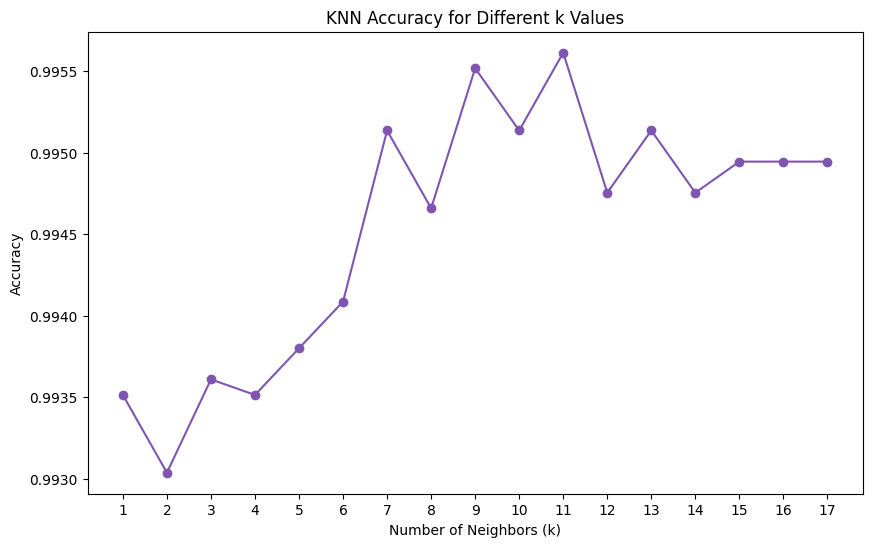

In [28]:
accuracy = []
k_values = range(1, 18) 

for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    predict_labels_val_knn = neigh.predict(X_val)
    acc = accuracy_score(y_val, predict_labels_val_knn)
    accuracy.append(acc)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o' , color='#7F55B1')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.show()


## Decision Tree
- Useful for understanding tree splits.

---

## ⚙️ How does it work?

1) Root Node: Start with the entire dataset.

2) Splitting: Choose a feature to split on, dividing the dataset into subsets.

3) Recursive Splitting: Each subset becomes a new node, and the process continues.

4) Stopping Condition: Splitting stops when:

- All samples belong to the same class.
- No features are left.
- Predefined stopping criteria (e.g., max depth, min samples).

5) Prediction: For a new instance, traverse the tree from root to a leaf, applying conditions until a leaf node (class) is reached.

## 🧠 How are splits chosen? 

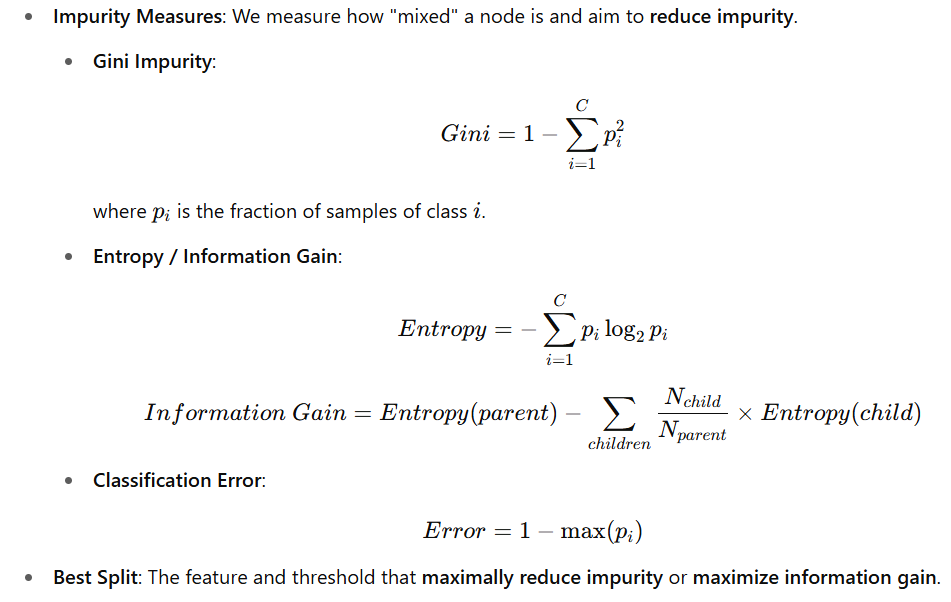

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score , confusion_matrix
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

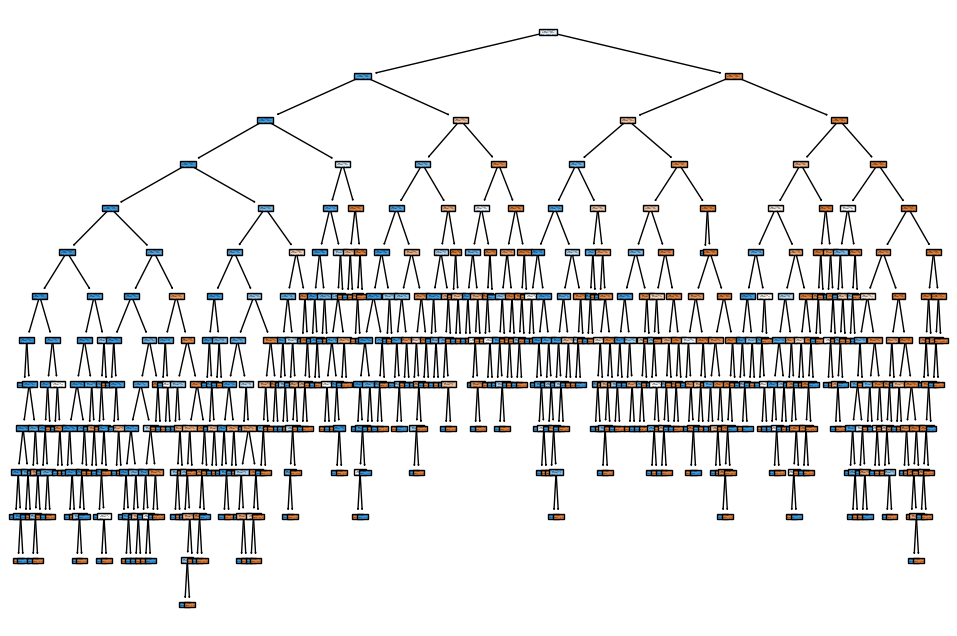

In [31]:
plt.figure(figsize=(12,8))
plot_tree(dtree,  filled=True)
plt.show()

In [33]:
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

accuracy_score(y_test, y_pred_dtree)

0.9877885899637474

In [34]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

dt = DecisionTreeClassifier(criterion='gini',   # Can be 'gini' or 'entropy'
                            max_depth=2,        # Maximum depth of the tree
                            min_samples_split=2,# Min samples required to split an internal node
                            min_samples_leaf=1, # Min samples required to be at a leaf node
                            random_state=42)


In [36]:
dt.fit(X_train, y_train)
y_pred_df = dt.predict(X_test)
pd.DataFrame(y_pred_df)

,0
0,0
1,1
2,0
3,1
4,0
...,...
5236,0
5237,0
5238,1
5239,0


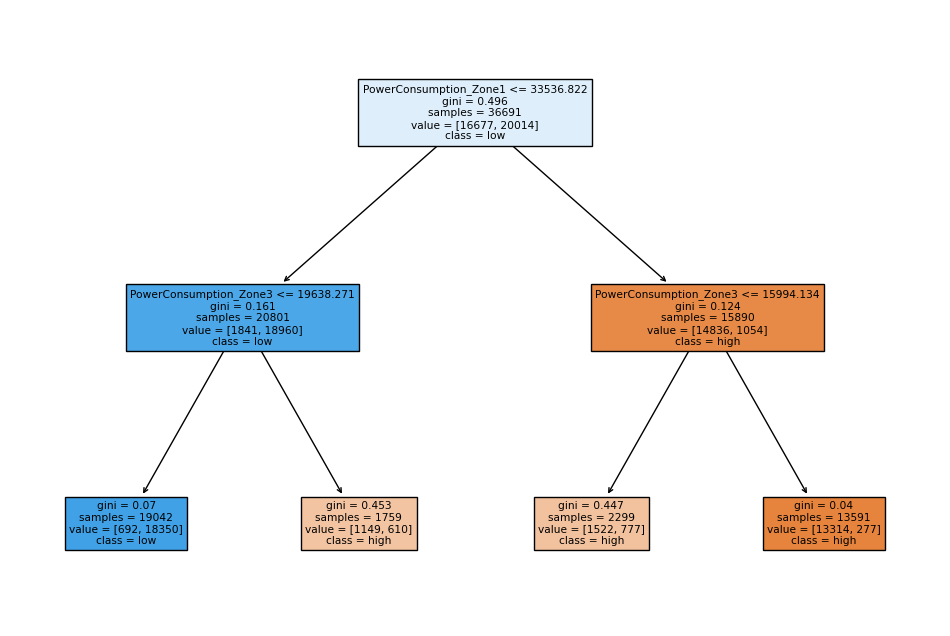

In [43]:
plt.figure(figsize=(12,8))
plot_tree(dt,  feature_names=['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'] , class_names =['high' , 'low'] , filled=True)
plt.show()

In [141]:
accuracy_score(y_test, y_pred_df)

0.936844113718756

## 🎯 Why Hyperparameter Tuning?

Complexity of the model (e.g., max_depth, min_samples_split).

Overfitting/underfitting.


## Common Tuning Method

In [134]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [2 , 3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_leaf_nodes': [None, 5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',

)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [135]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

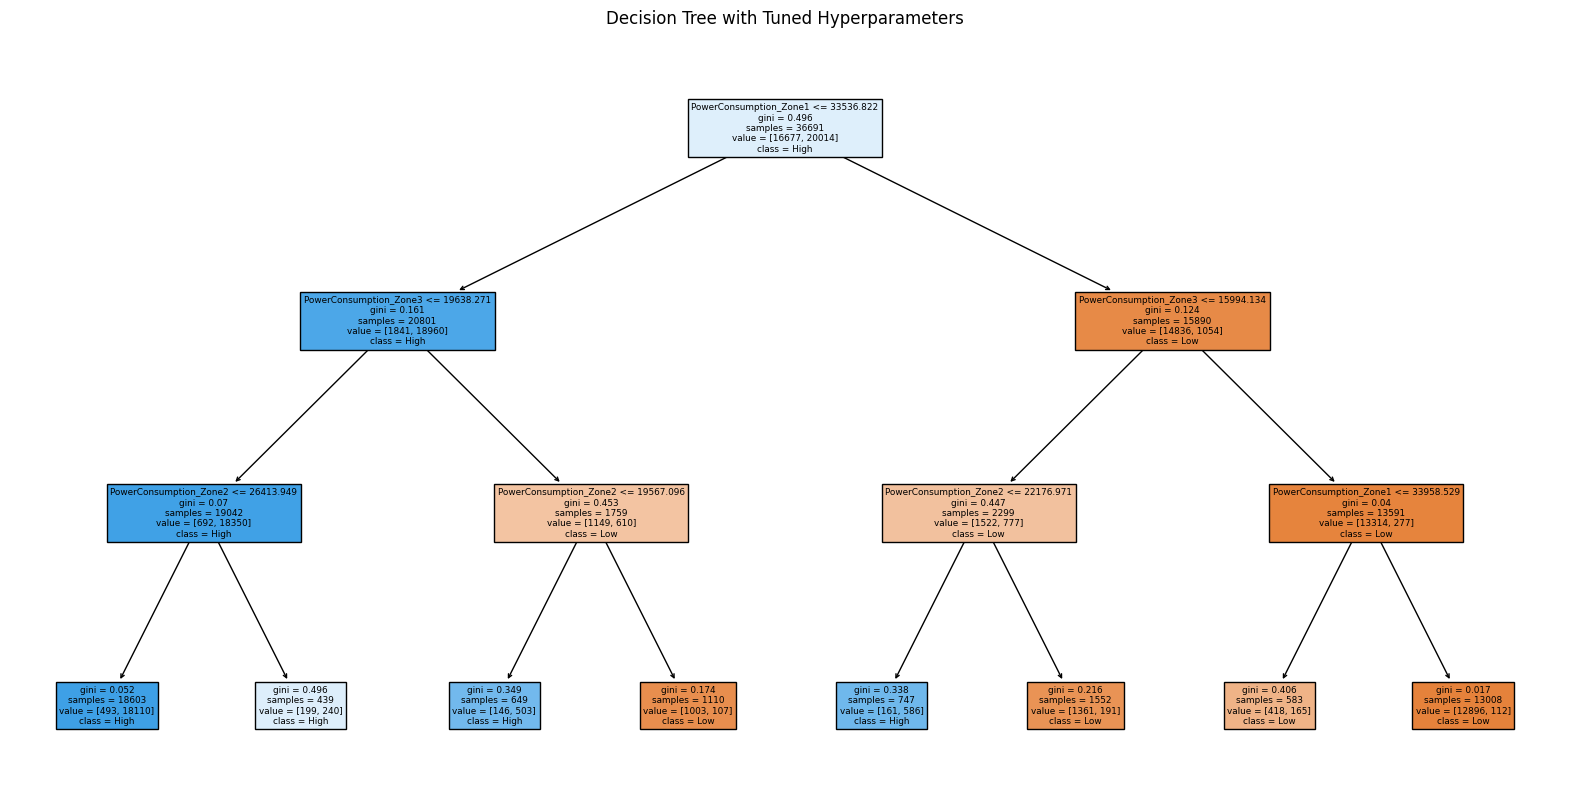

In [136]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, class_names=['Low', 'High'], feature_names=X_train.columns ,filled=false)
plt.title("Decision Tree with Tuned Hyperparameters")
plt.show()

In [47]:

confusion_matrix(y_test, y_pred_df)

array([[2311,  100],
       [ 231, 2599]], dtype=int64)

In [137]:
classification_metrics_table(confusion_matrix(y_test, y_pred))

,Predicted 0,Predicted 1,Class Recall (%)
Actual 0,2251,160,93.36%
Actual 1,91,2739,96.78%
Class Precision (%),96.11%,94.48%,
,,,Accuracy: 95.21%


In [48]:
X_test.shape

(5241, 8)